# Example 1: Use of surface model Dubois95 and canopy model SSRT

## 1. Requirements

- Installation of SenSE

## 2. Dubois95+SSRT for different incidence angles

In [1]:
import numpy as np
#from sense.surface import Dubois95, Oh92
from sense.util import f2lam
from sense.model import RTModel
from sense.soil import Soil
from sense.canopy import OneLayer
import matplotlib.pyplot as plt

/home/tweiss/anaconda3/envs/sense/lib/python3.10/site-packages/sense-0.1-py3.10.egg/sense/surface/i2em.py:282: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(cache=True)


In [3]:
theta_deg = np.arange(0.,70.)
theta = np.deg2rad(theta_deg)

# soil model parameters
f  = 13.  # GHz
lam = f2lam(f)  # m
s = 0.0015  # m
eps = 15. - 4.0j


models = {'surface' : 'Dubois95', 'canopy' : 'turbid_rayleigh'}

pol='vv'


In [4]:
# short alfalfa

d = 0.17
tau = 2.5
ke = tau/d
omega = 0.27
ks=omega*ke
# Soil model initialization
S = Soil(f=f, s=s, eps=eps)
# Canopy model initialization
C = OneLayer(ke_h=ke, ke_v=ke, d=d, ks_v=ks, ks_h=ks, canopy=models['canopy'])
# Combined Model initialization
RT = RTModel(theta=theta, models=models, surface=S, canopy=C, freq=f)
# Run RT model
RT.sigma0()
back_short = RT.stot[pol]

/home/tweiss/anaconda3/envs/sense/lib/python3.10/site-packages/sense-0.1-py3.10.egg/sense/surface/dubois95.py:44: RuntimeWarning: divide by zero encountered in divide
  b = 10.**(-2.35)*((np.cos(self.theta)**3.) / (np.sin(self.theta)**3.))
/home/tweiss/anaconda3/envs/sense/lib/python3.10/site-packages/sense-0.1-py3.10.egg/sense/surface/dubois95.py:48: RuntimeWarning: invalid value encountered in multiply
  return b*c*d
/home/tweiss/anaconda3/envs/sense/lib/python3.10/site-packages/sense-0.1-py3.10.egg/sense/surface/dubois95.py:36: RuntimeWarning: divide by zero encountered in divide
  a = (10.**-2.75)*(np.cos(self.theta)**1.5)/(np.sin(self.theta)**5.)
/home/tweiss/anaconda3/envs/sense/lib/python3.10/site-packages/sense-0.1-py3.10.egg/sense/surface/dubois95.py:40: RuntimeWarning: invalid value encountered in multiply
  return a*c*d


In [5]:
# tall alfalfa
d = 0.55
tau = 0.45
ke = tau/d
omega = 0.175
ks=omega*ke
S = Soil(f=f, s=s, eps=eps)
C = OneLayer(ke_h=ke, ke_v=ke, d=d, ks_v=ks, ks_h=ks, canopy=models['canopy'])
RT = RTModel(theta=theta, models=models, surface=S, canopy=C, freq=f)
RT.sigma0()

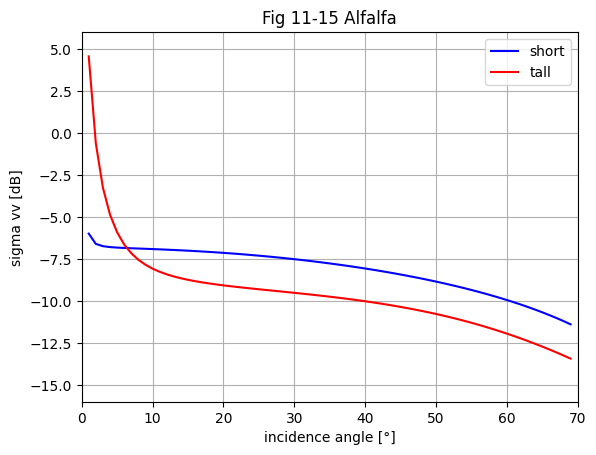

In [6]:
# plot first part
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(theta_deg, 10.*np.log10(back_short), label='short', color='b')
ax.plot(theta_deg, 10.*np.log10(RT.stot[pol]), label='tall', color='r')

ax.legend()
ax.set_title('Fig 11-15 Alfalfa')


ax.grid()
ax.set_xlabel('incidence angle [°]')
ax.set_ylabel('sigma vv [dB]')
ax.set_xlim(0.,70.)
ax.set_ylim(-16.,6.)

plt.show()